In [61]:
# ============================================================================
# HEADER AND SETUP
# ============================================================================
"""
HDI Data Analysis Assignment
Student Name: Aakash Lopchan
Student ID: 2548875
Course:
Date: January 2026
"""


'\nHDI Data Analysis Assignment\nStudent Name: Aakash Lopchan\nStudent ID: 2548875\nCourse:\nDate: January 2026\n'

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [64]:
# ============================================================================
# LOAD DATASET
# ============================================================================
# Upload your dataset first in Google Colab using the file upload button
# mount Google Drive

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Human_Development_Index_Dataset.csv',encoding='latin1')

print(f" Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dataset loaded successfully!
Shape: (6798, 30)

First few rows:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [65]:
#  PROBLEM 1A - TASK 1 (Extract Latest Year)
# ============================================================================

print("PROBLEM 1A: Single Year HDI Exploration (2022)")
print("\n--- Task 1: Extract Latest Year ---")

# Identify unique years
unique_years = sorted(df['year'].unique())
print(f"Unique years in dataset: {unique_years}")
print(f"Total years: {len(unique_years)}")

# Filter for 2022
hdi_2022_df = df[df['year'] == 2022].copy()
print(f"\nRows in 2022 dataset: {len(hdi_2022_df)}")

PROBLEM 1A: Single Year HDI Exploration (2022)

--- Task 1: Extract Latest Year ---
Unique years in dataset: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Total years: 33

Rows in 2022 dataset: 206


In [66]:
# ============================================================================
# PROBLEM 1A - TASK 2 (Data Exploration)
# ============================================================================
print("\n--- Task 2: Data Exploration ---")

# Display first 10 rows
print("\nFirst 10 rows of 2022 dataset:")
display(hdi_2022_df.head(10))

# Count rows and columns
print(f"\n Dataset shape: {hdi_2022_df.shape}")
print(f" Number of rows: {hdi_2022_df.shape[0]}")
print(f" Number of columns: {hdi_2022_df.shape[1]}")

# List column names and data types
print("\nColumn names and data types:")
print(hdi_2022_df.dtypes)

# Get column names for reference
print("\n All columns:", list(hdi_2022_df.columns))


--- Task 2: Data Exploration ---

First 10 rows of 2022 dataset:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621



 Dataset shape: (206, 30)
 Number of rows: 206
 Number of columns: 30

Column names and data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_pa

In [67]:
# ============================================================================
# PROBLEM 1A - TASK 3 (Missing Values Check)
# ============================================================================
print("\n--- Task 3: Missing Values & Data Cleaning ---")

# Check for missing values
print("\nMissing values per column:")
missing_values = hdi_2022_df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {hdi_2022_df.isnull().sum().sum()}")

# Check data info
print("\nDataset Info:")
hdi_2022_df.info()



--- Task 3: Missing Values & Data Cleaning ---

Missing values per column:
hdi                           2
hdi_f                        13
hdi_m                        13
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

Total missing values: 212

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  --

In [68]:
# ============================================================================
# PROBLEM 1A - TASK 3 (Data Cleaning)
# ============================================================================
print("\n--- Cleaning Process ---")

# Check for special characters representing missing data
print("\nChecking for special characters (e.g., '–', '..'):")
for col in hdi_2022_df.select_dtypes(include=['object']).columns:
    special_chars = hdi_2022_df[col].astype(str).str.contains('–|\.\.', na=False).sum()
    if special_chars > 0:
        print(f"  {col}: {special_chars} instances")

# Replace special characters with NaN
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == 'object':
        hdi_2022_df[col] = hdi_2022_df[col].replace(['–', '..', ''], np.nan)

# Convert numeric columns stored as text
numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')
        print(f" Converted {col} to numeric")

# Check for duplicates
duplicates = hdi_2022_df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")
if duplicates > 0:
    hdi_2022_df = hdi_2022_df.drop_duplicates()
    print(f" Removed {duplicates} duplicate rows")

# Handle missing values
print("\nHandling missing values:")
print(f"Rows before cleaning: {len(hdi_2022_df)}")
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi', 'country'])
print(f"Rows after cleaning: {len(hdi_2022_df)}")
print(" Justification: Dropped rows with missing HDI or country as these are essential for analysis")


--- Cleaning Process ---

Checking for special characters (e.g., '–', '..'):
 Converted hdi to numeric
 Converted life_expectancy to numeric
 Converted gross_inc_percap to numeric
 Converted gender_development to numeric

 Duplicate rows: 0

Handling missing values:
Rows before cleaning: 206
Rows after cleaning: 204
 Justification: Dropped rows with missing HDI or country as these are essential for analysis


In [69]:
# ============================================================================
# PROBLEM 1A - TASK 4 (Basic Statistics)
# ============================================================================
print("\n--- Task 4: Basic Statistics ---")

# Compute statistics
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print(f"\nHDI Statistics for 2022:")
print(f" Mean: {hdi_mean:.4f}")
print(f" Median: {hdi_median:.4f}")
print(f" Standard Deviation: {hdi_std:.4f}")

# Highest HDI
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), 'country']
highest_hdi_value = hdi_2022_df['hdi'].max()
print(f"\n Country with HIGHEST HDI: {highest_hdi_country} ({highest_hdi_value:.4f})")

# Lowest HDI
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), 'country']
lowest_hdi_value = hdi_2022_df['hdi'].min()
print(f"Country with LOWEST HDI: {lowest_hdi_country} ({lowest_hdi_value:.4f})")


--- Task 4: Basic Statistics ---

HDI Statistics for 2022:
 Mean: 0.7229
 Median: 0.7395
 Standard Deviation: 0.1530

 Country with HIGHEST HDI: Switzerland (0.9670)
Country with LOWEST HDI: Somalia (0.3800)


In [70]:
# ============================================================================
# PROBLEM 1A - TASK 5 (Filtering and Sorting)
# ============================================================================
print("\n--- Task 5: Filtering and Sorting ---")

# Filter countries with HDI > 0.800
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()
print(f"\n Countries with HDI > 0.800: {len(high_hdi)}")

# Sort by GNI per capita
if 'gross_inc_percap' in high_hdi.columns:
    high_hdi_sorted = high_hdi.sort_values('gross_inc_percap', ascending=False)
    print("\nTop 10 countries by GNI per Capita (among high HDI countries):")
    display(high_hdi_sorted[['country', 'hdi', 'gross_inc_percap']].head(10))
else:
    print("Column 'gross_inc_percap' not found. Check column names.")



--- Task 5: Filtering and Sorting ---

 Countries with HDI > 0.800: 71

Top 10 countries by GNI per Capita (among high HDI countries):


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516



--- Task 6: Adding HDI Category Column ---

HDI Category Distribution:
HDI_Category
High         54
Low          35
Medium       44
Very High    71
Name: count, dtype: int64

Sample of categorized data:


,country,hdi,HDI_Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High


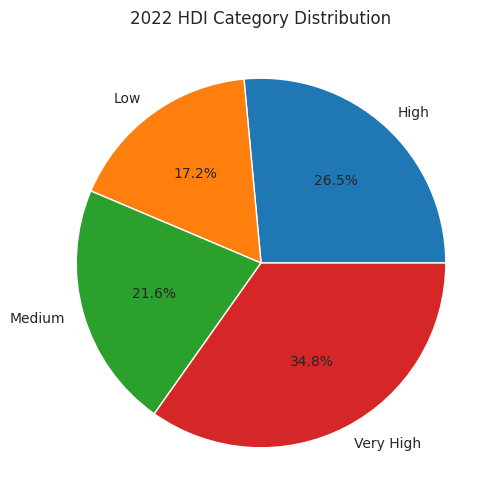

In [71]:
# ============================================================================
# PROBLEM 1A - TASK 6 (Adding HDI Category)
# ============================================================================
print("\n--- Task 6: Adding HDI Category Column ---")

# Define categorization function
def categorize_hdi(hdi_value):
    if pd.isna(hdi_value):
        return np.nan
    elif hdi_value < 0.550:
        return 'Low'
    elif hdi_value < 0.700:
        return 'Medium'
    elif hdi_value < 0.800:
        return 'High'
    else:
        return 'Very High'

# Apply categorization
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

# Verify classification
print("\nHDI Category Distribution:")
category_counts = hdi_2022_df['HDI_Category'].value_counts().sort_index()
print(category_counts)

# Show sample of categorized data
print("\nSample of categorized data:")
display(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(10))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('2022 HDI Category Distribution')
plt.ylabel('')
plt.savefig('figure1_hdi_categories.png', dpi=300, bbox_inches='tight')
plt.show()



In [72]:
# ============================================================================
# PROBLEM 1A - SAVE FILE
# ============================================================================
# Save the file
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)
print("\n File saved as: HDI_category_added.csv")

# Download file from Colab
from google.colab import files
files.download('HDI_category_added.csv')


 File saved as: HDI_category_added.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
# ============================================================================
# PROBLEM 1B - TASK 1 (Data Extraction)
# ============================================================================
print("\n" + "="*80)
print("PROBLEM 1B: HDI Visualization and Trend Analysis (2020-2022)")
print("="*80)
print("\n--- Task 1: Data Extraction and Saving ---")

# Filter for 2020-2022
hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()
print(f"Rows in 2020-2022 dataset: {len(hdi_1b_df)}")

# Check unique years
print(f" Years included: {sorted(hdi_1b_df['year'].unique())}")



PROBLEM 1B: HDI Visualization and Trend Analysis (2020-2022)

--- Task 1: Data Extraction and Saving ---
Rows in 2020-2022 dataset: 618
 Years included: [np.int64(2020), np.int64(2021), np.int64(2022)]


In [74]:

# ============================================================================
# PROBLEM 1B - TASK 2 (Data Cleaning)
# ============================================================================
print("\n--- Task 2: Data Cleaning ---")

# Check for missing values in essential columns
essential_cols = ['hdi', 'country', 'year']
print("\nMissing values in essential columns:")
for col in essential_cols:
    missing = hdi_1b_df[col].isnull().sum()
    print(f"  {col}: {missing}")

# Replace special characters
for col in hdi_1b_df.columns:
    if hdi_1b_df[col].dtype == 'object':
        hdi_1b_df[col] = hdi_1b_df[col].replace(['–', '..', ''], np.nan)

# Convert numeric columns
numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_columns:
    if col in hdi_1b_df.columns:
        hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col], errors='coerce')

# Remove duplicates
duplicates = hdi_1b_df.duplicated().sum()
if duplicates > 0:
    hdi_1b_df = hdi_1b_df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

# Drop rows with missing essential data
rows_before = len(hdi_1b_df)
hdi_1b_df = hdi_1b_df.dropna(subset=['hdi', 'country', 'year'])
print(f"\n Rows before cleaning: {rows_before}")
print(f" Rows after cleaning: {len(hdi_1b_df)}")

# Save the dataset
hdi_1b_df.to_csv('HDI_problem1B.csv', index=False)
print(" File saved as: HDI_problem1B.csv")
files.download('HDI_problem1B.csv')


--- Task 2: Data Cleaning ---

Missing values in essential columns:
  hdi: 8
  country: 0
  year: 0

 Rows before cleaning: 618
 Rows after cleaning: 610
 File saved as: HDI_problem1B.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Task 3: Visualization Tasks ---

A. Creating Line Chart - HDI Trend

Sample countries available:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']
Countries to plot: ['United States', 'China', 'India', 'Germany', 'Brazil']


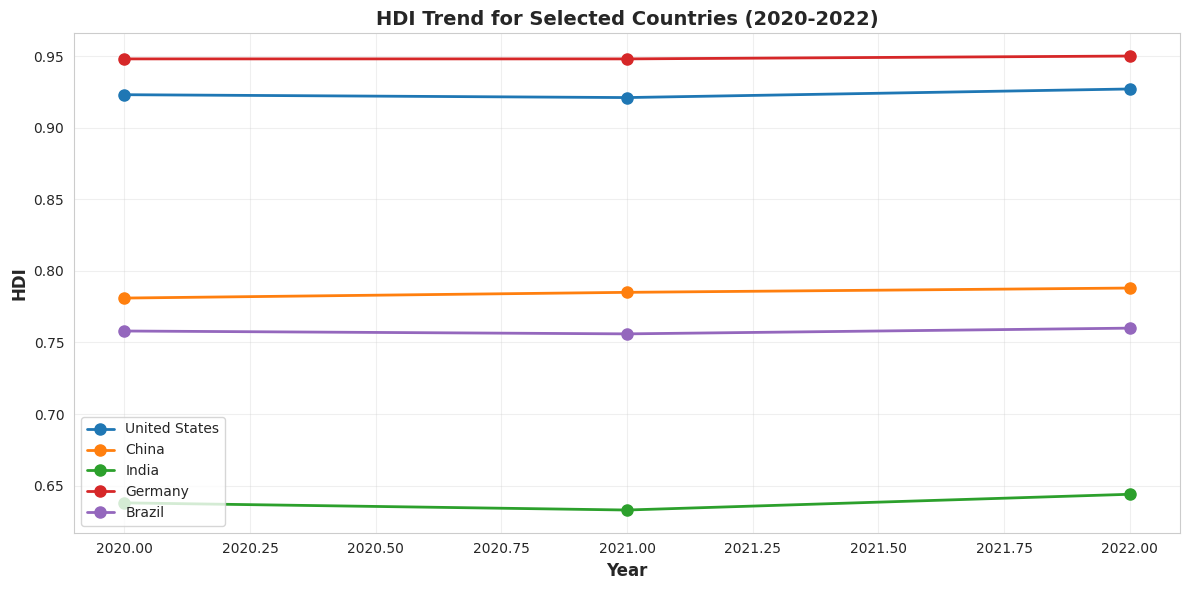

Line chart created and saved!


In [75]:
# ============================================================================
# PROBLEM 1B - TASK 3A (Line Chart)
# ============================================================================
print("\n--- Task 3: Visualization Tasks ---")
print("\nA. Creating Line Chart - HDI Trend")

# Select 5 countries (modify as needed based on your dataset)
# First, let's see what countries are available
print("\nSample countries available:")
print(list(hdi_1b_df['country'].unique()[:10]))

# You can customize this list based on available countries
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']

# Get actually available countries
available_countries = hdi_1b_df['country'].unique()
countries_to_plot = [c for c in selected_countries if c in available_countries]

# If selected countries don't exist, use first 5 available
if len(countries_to_plot) < 5:
    countries_to_plot = list(available_countries[:5])

print(f"Countries to plot: {countries_to_plot}")

# Create line chart
plt.figure(figsize=(12, 6))
for country in countries_to_plot:
    country_data = hdi_1b_df[hdi_1b_df['country'] == country].sort_values('year')
    plt.plot(country_data['year'], country_data['hdi'],
             marker='o', label=country, linewidth=2, markersize=8)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('HDI', fontsize=12, fontweight='bold')
plt.title('HDI Trend for Selected Countries (2020-2022)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('line_chart_hdi_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("Line chart created and saved!")


In [76]:
# ============================================================================
# PROBLEM 1B - TASK 3B (Bar Chart - Regional)
# ============================================================================
print("\nB. Creating Bar Chart - Average HDI by Region")

# Check if region column exists
if 'region' in hdi_1b_df.columns:
    # Calculate regional averages
    regional_hdi = hdi_1b_df.groupby(['region', 'year'])['hdi'].mean().reset_index()

    # Create grouped bar chart
    plt.figure(figsize=(14, 6))
    regions = regional_hdi['region'].unique()
    x = np.arange(len(regions))
    width = 0.25

    colors = ['#3498db', '#e74c3c', '#2ecc71']
    for i, year in enumerate([2020, 2021, 2022]):
        year_data = regional_hdi[regional_hdi['year'] == year]
        values = [year_data[year_data['region'] == r]['hdi'].values[0]
                  if r in year_data['region'].values else 0 for r in regions]
        plt.bar(x + i*width, values, width, label=str(year), color=colors[i])

    plt.xlabel('Region', fontsize=12, fontweight='bold')
    plt.ylabel('Average HDI', fontsize=12, fontweight='bold')
    plt.title('Average HDI by Region (2020-2022)', fontsize=14, fontweight='bold')
    plt.xticks(x + width, regions, rotation=45, ha='right')
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig('bar_chart_regional_hdi.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Regional bar chart created and saved!")
else:
    print(" Region column not found in dataset")
    print("Available columns:", list(hdi_1b_df.columns))



B. Creating Bar Chart - Average HDI by Region
 Region column not found in dataset
Available columns: ['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']



C. Creating Box Plot - HDI Distribution


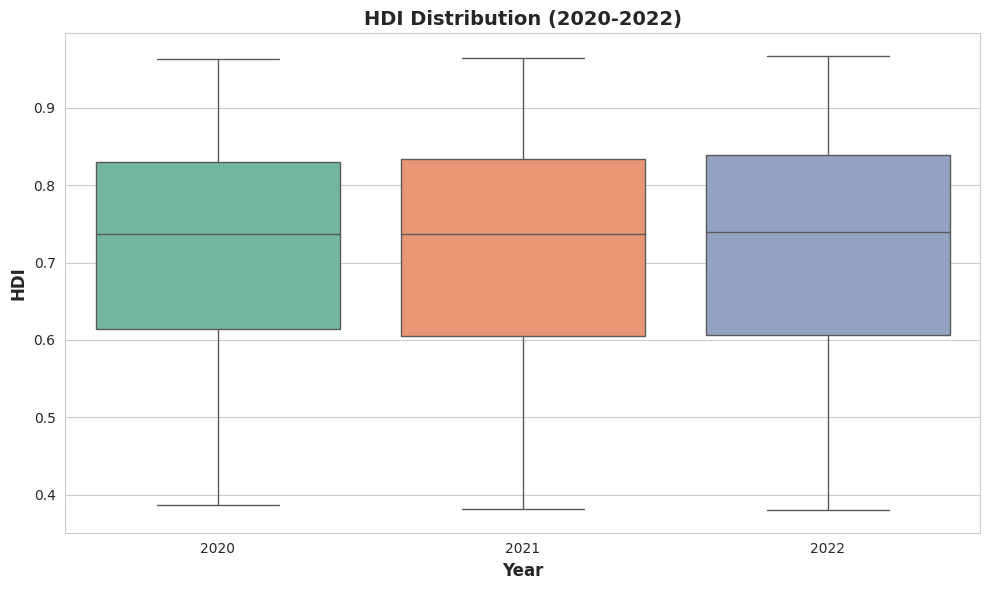


Distribution Statistics by Year:

2020:
  Median: 0.7370
  Q1: 0.6135
  Q3: 0.8300
  IQR: 0.2165

2021:
  Median: 0.7370
  Q1: 0.6045
  Q3: 0.8340
  IQR: 0.2295

2022:
  Median: 0.7395
  Q1: 0.6065
  Q3: 0.8395
  IQR: 0.2330

Box plot created and saved!

Interpretation: The box plot shows the spread and central tendency of HDI across years.
Look for changes in median, spread (IQR), and presence of outliers.


In [77]:
# ============================================================================
# PROBLEM 1B - TASK 3C (Box Plot)
# ============================================================================
print("\nC. Creating Box Plot - HDI Distribution")

plt.figure(figsize=(10, 6))
sns.boxplot(data=hdi_1b_df, x='year', y='hdi', palette='Set2')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('HDI', fontsize=12, fontweight='bold')
plt.title('HDI Distribution (2020-2022)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('boxplot_hdi_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



# Calculate and display statistics
print("\nDistribution Statistics by Year:")
for year in [2020, 2021, 2022]:
    year_data = hdi_1b_df[hdi_1b_df['year'] == year]['hdi']
    print(f"\n{year}:")
    print(f"  Median: {year_data.median():.4f}")
    print(f"  Q1: {year_data.quantile(0.25):.4f}")
    print(f"  Q3: {year_data.quantile(0.75):.4f}")
    print(f"  IQR: {year_data.quantile(0.75) - year_data.quantile(0.25):.4f}")

print("\nBox plot created and saved!")
print("\nInterpretation: The box plot shows the spread and central tendency of HDI across years.")
print("Look for changes in median, spread (IQR), and presence of outliers.")



D. Creating Scatter Plot - HDI vs GNI per Capita


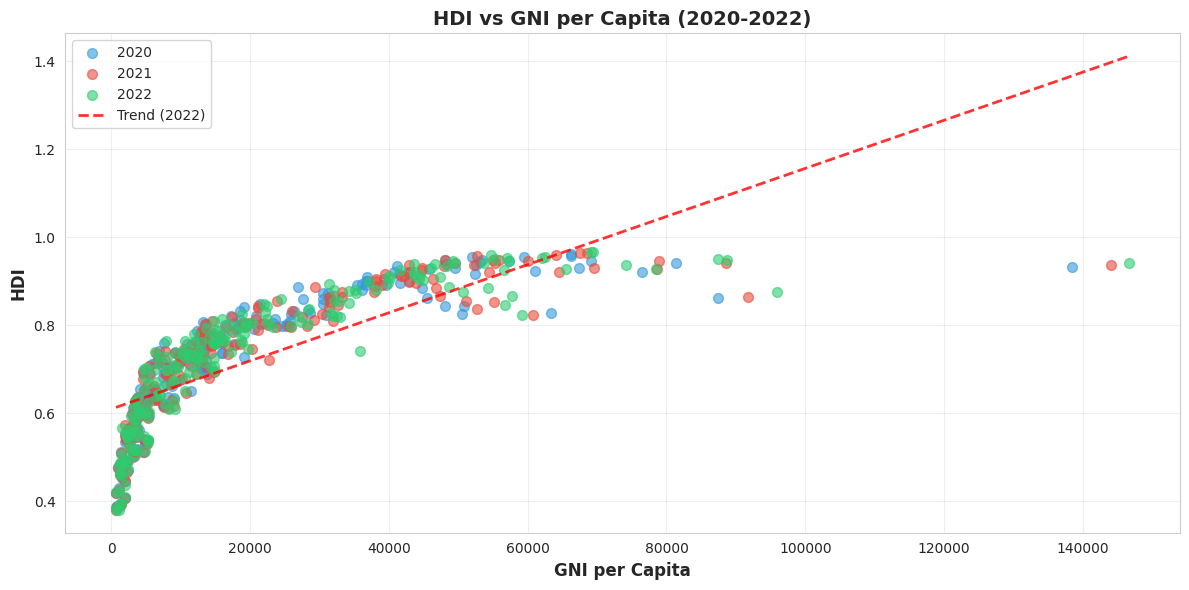

In [78]:
# ============================================================================
# PROBLEM 1B - TASK 3D (Scatter Plot)
# ============================================================================
print("\nD. Creating Scatter Plot - HDI vs GNI per Capita")

if 'gross_inc_percap' in hdi_1b_df.columns:
    plt.figure(figsize=(12, 6))

    colors = {'2020': '#3498db', '2021': '#e74c3c', '2022': '#2ecc71'}

    for year in [2020, 2021, 2022]:
        year_data = hdi_1b_df[hdi_1b_df['year'] == year].dropna(subset=['gross_inc_percap', 'hdi'])
        plt.scatter(year_data['gross_inc_percap'], year_data['hdi'],
                   alpha=0.6, label=str(year), s=50, color=colors[str(year)])

    # Add regression line for 2022
    year_2022_data = hdi_1b_df[hdi_1b_df['year'] == 2022].dropna(subset=['gross_inc_percap', 'hdi'])
    if len(year_2022_data) > 0:
        z = np.polyfit(year_2022_data['gross_inc_percap'], year_2022_data['hdi'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(year_2022_data['gross_inc_percap'].min(),
                             year_2022_data['gross_inc_percap'].max(), 100)
        plt.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label='Trend (2022)')

    plt.xlabel('GNI per Capita', fontsize=12, fontweight='bold')
    plt.ylabel('HDI', fontsize=12, fontweight='bold')
    plt.title('HDI vs GNI per Capita (2020-2022)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('scatter_hdi_vs_gni.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(" GNI per Capita variable not available in the dataset.")
    plt.figure(figsize=(10,6))



In [79]:
# ============================================================================
#PROBLEM 1B - TASK 4 (Analysis Questions)
# ============================================================================
print("\n--- Task 4: Short Analysis Questions ---")

# Q1: Greatest improvement
print("\n" + "="*60)
print("Q1: Countries with greatest improvement (2020 to 2022)")
print("="*60)

countries_both_years = hdi_1b_df[hdi_1b_df['year'].isin([2020, 2022])].copy()
pivot_improvement = countries_both_years.pivot_table(values='hdi', index='country', columns='year')

# Calculate improvement only if both years exist
pivot_improvement = pivot_improvement.dropna()
pivot_improvement['improvement'] = pivot_improvement[2022] - pivot_improvement[2020]

top_improvers = pivot_improvement.nlargest(5, 'improvement')
print("\nTop 5 Countries with Improvement:")
display(top_improvers[['improvement', 2020, 2022]])

# Q2: Countries with decline
print("\n" + "="*60)
print("Q2: Countries with decline in HDI")
print("="*60)

decliners = pivot_improvement[pivot_improvement['improvement'] < 0]
if len(decliners) > 0:
    print(f"\n Found {len(decliners)} countries with HDI decline")
    worst_decliners = decliners.nsmallest(5, 'improvement')
    display(worst_decliners[['improvement', 2020, 2022]])
    print("\nPossible reasons:")
    print("  • Economic crises or recessions")
    print("  • Political instability or conflict")
    print("  • Pandemic impacts on health and education")
    print("  • Natural disasters")
else:
    print(" No countries experienced HDI decline during this period")

# Q3: Regional analysis
print("\n" + "="*60)
print("Q3: Regional HDI Performance")
print("="*60)

if 'region' in hdi_1b_df.columns:
    regional_avg = hdi_1b_df.groupby('region')['hdi'].mean().sort_values(ascending=False)
    print("\nAverage HDI by Region (2020-2022):")
    display(regional_avg)
    print(f"\n HIGHEST Average HDI: {regional_avg.index[0]} ({regional_avg.iloc[0]:.4f})")
    print(f"LOWEST Average HDI: {regional_avg.index[-1]} ({regional_avg.iloc[-1]:.4f})")
else:
    print("Region column not available for analysis")

# Q4: COVID-19 impact discussion
print("\n" + "="*60)
print("Q4: COVID-19 Impact on HDI Trends")
print("="*60)
print("""
Analysis of COVID-19 impacts on HDI (2020-2022):

1. HEALTH DIMENSION:
   • Direct mortality from COVID-19
   • Disrupted healthcare services
   • Potential decrease in life expectancy

2. EDUCATION DIMENSION:
   • School closures affecting learning
   • Reduced expected years of schooling
   • Digital divide in remote learning access

3. ECONOMIC DIMENSION:
   • GDP contractions in 2020
   • Unemployment and income losses
   • Impact on GNI per capita

4. REGIONAL VARIATIONS:
   • Developed countries: Better healthcare infrastructure, quicker recovery
   • Developing countries: More severe economic impacts, limited safety nets

5. RECOVERY PATTERNS:
   • 2020: Peak impact year
   • 2021: Gradual recovery begins
   • 2022: Continued recovery, but many countries still below 2019 levels """)


--- Task 4: Short Analysis Questions ---

Q1: Countries with greatest improvement (2020 to 2022)

Top 5 Countries with Improvement:


year,improvement,2020,2022
country,,,
Andorra,0.041,0.843,0.884
Azerbaijan,0.038,0.722,0.760
Ecuador,0.031,0.734,0.765
Maldives,0.025,0.737,0.762
Mexico,0.024,0.757,0.781



Q2: Countries with decline in HDI

 Found 54 countries with HDI decline


year,improvement,2020,2022
country,,,
Timor-Leste,-0.067,0.633,0.566
Ukraine,-0.028,0.762,0.734
Afghanistan,-0.026,0.488,0.462
Namibia,-0.024,0.634,0.610
Lebanon,-0.019,0.742,0.723



Possible reasons:
  • Economic crises or recessions
  • Political instability or conflict
  • Pandemic impacts on health and education
  • Natural disasters

Q3: Regional HDI Performance
Region column not available for analysis

Q4: COVID-19 Impact on HDI Trends

Analysis of COVID-19 impacts on HDI (2020-2022):

1. HEALTH DIMENSION:
   • Direct mortality from COVID-19
   • Disrupted healthcare services
   • Potential decrease in life expectancy

2. EDUCATION DIMENSION:
   • School closures affecting learning
   • Reduced expected years of schooling
   • Digital divide in remote learning access

3. ECONOMIC DIMENSION:
   • GDP contractions in 2020
   • Unemployment and income losses
   • Impact on GNI per capita

4. REGIONAL VARIATIONS:
   • Developed countries: Better healthcare infrastructure, quicker recovery
   • Developing countries: More severe economic impacts, limited safety nets

5. RECOVERY PATTERNS:
   • 2020: Peak impact year
   • 2021: Gradual recovery begins
   • 2022: Co

In [80]:
# ============================================================================
# PROBLEM 2 - TASK 1 (South Asia Subset)
# ============================================================================
print("\n" + "="*80)
print("PROBLEM 2: Advanced HDI Exploration")
print("="*80)
print("\n--- Task 1: Create South Asia Subset ---")

# Define South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter dataset
hdi_south_asia = df[df['country'].isin(south_asian_countries)].copy()
print(f" South Asia dataset rows: {len(hdi_south_asia)}")
print(f" Years covered: {sorted(hdi_south_asia['year'].unique())}")
print(f"\n Countries found: {list(hdi_south_asia['country'].unique())}")

# Check if all countries are present
missing_countries = set(south_asian_countries) - set(hdi_south_asia['country'].unique())
if missing_countries:
    print(f"Missing countries: {missing_countries}")

# Clean the data
for col in hdi_south_asia.columns:
    if hdi_south_asia[col].dtype == 'object':
        hdi_south_asia[col] = hdi_south_asia[col].replace(['–', '..', ''], np.nan)

numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_columns:
    if col in hdi_south_asia.columns:
        hdi_south_asia[col] = pd.to_numeric(hdi_south_asia[col], errors='coerce')

# Save the dataset
hdi_south_asia.to_csv('HDI_SouthAsia.csv', index=False)
print("\nFile saved as: HDI_SouthAsia.csv")
files.download('HDI_SouthAsia.csv')


PROBLEM 2: Advanced HDI Exploration

--- Task 1: Create South Asia Subset ---
 South Asia dataset rows: 264
 Years covered: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

 Countries found: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

File saved as: HDI_SouthAsia.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Task 2: Composite Development Score ---
 Using data from year: 2022
Available columns: ['life_expectancy', 'gross_inc_percap']

 South Asian countries ranked by Composite Score:


,country,Composite_Score,hdi,life_expectancy,gross_inc_percap
3530,Maldives,0.600000,0.762,80.839,18846.792190
5477,Sri Lanka,0.410342,0.780,76.610,11899.498470
659,Bhutan,0.315326,0.681,72.229,10624.873880
461,Bangladesh,0.269390,0.670,73.698,6511.122178
2573,India,0.177463,0.644,67.744,6950.526798
4091,Nepal,0.173122,0.601,70.484,4025.554685
4388,Pakistan,0.128527,0.540,66.431,5374.270423
32,Afghanistan,0.000000,0.462,62.879,1335.205733


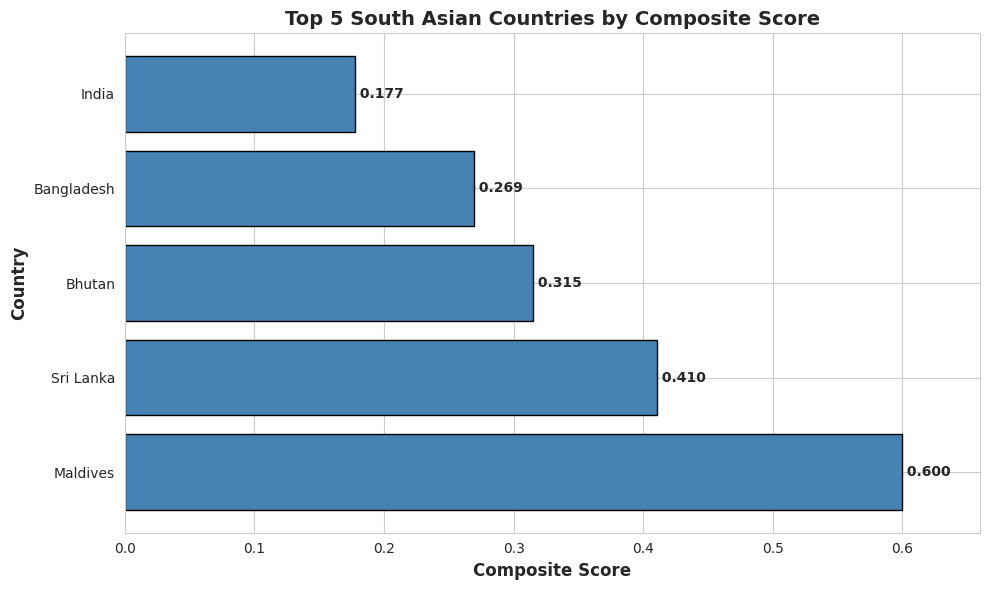


--- Comparison: Composite Score Rank vs HDI Rank ---


,country,Composite_Score,hdi,Composite_Rank,HDI_Rank,Rank_Difference
5477,Sri Lanka,0.410342,0.780,2,1,-1
3530,Maldives,0.600000,0.762,1,2,1
659,Bhutan,0.315326,0.681,3,3,0
461,Bangladesh,0.269390,0.670,4,4,0
2573,India,0.177463,0.644,5,5,0
4091,Nepal,0.173122,0.601,6,6,0
4388,Pakistan,0.128527,0.540,7,7,0
32,Afghanistan,0.000000,0.462,8,8,0



Interpretation:
Countries with positive 'Rank_Difference' rank HIGHER by HDI than Composite Score
This suggests other factors (like education) contribute more to their HDI


In [81]:
# ============================================================================
# PROBLEM 2 - TASK 2 (Composite Score)
# ============================================================================
print("\n--- Task 2: Composite Development Score ---")

# Use latest year data
latest_year = hdi_south_asia['year'].max()
sa_latest = hdi_south_asia[hdi_south_asia['year'] == latest_year].copy()
print(f" Using data from year: {latest_year}")

# Check required columns
required_cols = ['life_expectancy', 'gross_inc_percap']
available_cols = [col for col in required_cols if col in sa_latest.columns]
print(f"Available columns: {available_cols}")

if 'life_expectancy' in sa_latest.columns and 'gross_inc_percap' in sa_latest.columns:
    # Remove rows with missing values
    sa_latest_clean = sa_latest.dropna(subset=['life_expectancy', 'gross_inc_percap'])

    # Normalize the metrics (0-1 scale)
    sa_latest_clean['life_exp_index'] = (
        (sa_latest_clean['life_expectancy'] - sa_latest_clean['life_expectancy'].min()) /
        (sa_latest_clean['life_expectancy'].max() - sa_latest_clean['life_expectancy'].min())
    )

    sa_latest_clean['gni_index'] = (
        (sa_latest_clean['gross_inc_percap'] - sa_latest_clean['gross_inc_percap'].min()) /
        (sa_latest_clean['gross_inc_percap'].max() - sa_latest_clean['gross_inc_percap'].min())
    )

    # Calculate Composite Score
    sa_latest_clean['Composite_Score'] = (
        0.30 * sa_latest_clean['life_exp_index'] +
        0.30 * sa_latest_clean['gni_index']
    )

    # Rank countries
    sa_ranked = sa_latest_clean.sort_values('Composite_Score', ascending=False)
    print("\n South Asian countries ranked by Composite Score:")
    display(sa_ranked[['country', 'Composite_Score', 'hdi', 'life_expectancy', 'gross_inc_percap']])

    # Plot top 5
    top_5 = sa_ranked.head(5)
    plt.figure(figsize=(10, 6))
    plt.barh(top_5['country'], top_5['Composite_Score'], color='steelblue', edgecolor='black')
    plt.xlabel('Composite Score', fontsize=12, fontweight='bold')
    plt.ylabel('Country', fontsize=12, fontweight='bold')
    plt.title('Top 5 South Asian Countries by Composite Score', fontsize=14, fontweight='bold')
    plt.xlim(0, max(top_5['Composite_Score']) * 1.1)

    # Add value labels
    for i, v in enumerate(top_5['Composite_Score']):
        plt.text(v, i, f' {v:.3f}', va='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('composite_score_top5.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Compare rankings
    print("\n--- Comparison: Composite Score Rank vs HDI Rank ---")
    comparison = sa_ranked[['country', 'Composite_Score', 'hdi']].copy()
    comparison['Composite_Rank'] = range(1, len(comparison) + 1)
    comparison = comparison.sort_values('hdi', ascending=False)
    comparison['HDI_Rank'] = range(1, len(comparison) + 1)
    comparison['Rank_Difference'] = comparison['HDI_Rank'] - comparison['Composite_Rank']
    display(comparison)

    print("\nInterpretation:")
    print("Countries with positive 'Rank_Difference' rank HIGHER by HDI than Composite Score")
    print("This suggests other factors (like education) contribute more to their HDI")
else:
    print(" Required columns not available for Composite Score calculation")



--- Task 3: Outlier Detection ---

HDI Outlier Bounds:
  Lower: 0.4125
  Upper: 0.8745

GNI per Capita Outlier Bounds:
  Lower: -3822.57
  Upper: 19803.19

 Outliers detected: 0


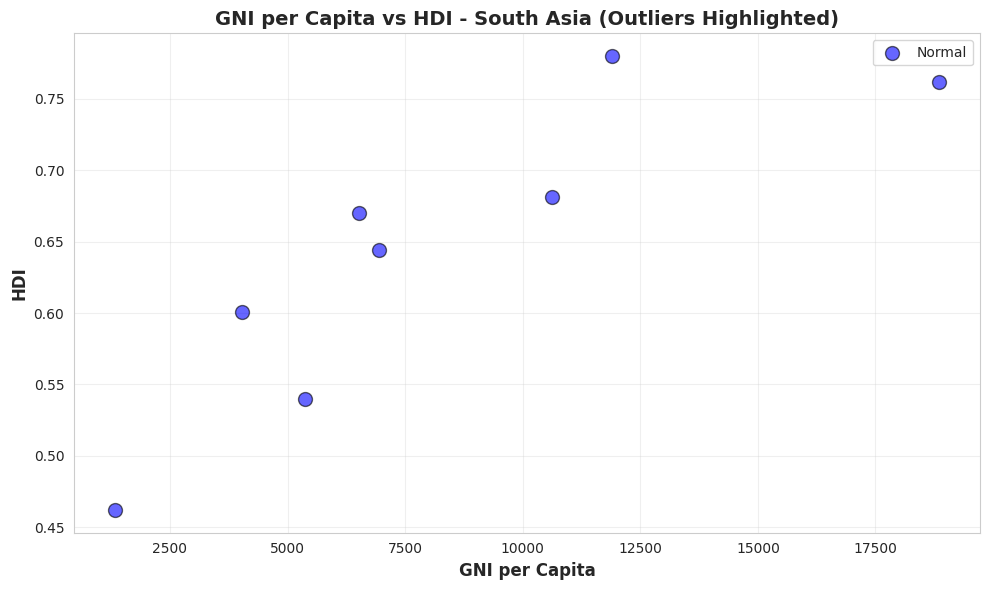


--- Outlier Discussion ---
No outliers detected in this regional subset.
All countries follow similar development patterns relative to income levels.


In [82]:
# ============================================================================
# PROBLEM 2 - TASK 3 (Outlier Detection)
# ============================================================================
print("\n--- Task 3: Outlier Detection ---")

# Use cleaned data
sa_for_outliers = sa_latest.dropna(subset=['hdi', 'gross_inc_percap'])

if len(sa_for_outliers) > 3:  # Need at least 4 data points for IQR
    # IQR method for HDI
    Q1_hdi = sa_for_outliers['hdi'].quantile(0.25)
    Q3_hdi = sa_for_outliers['hdi'].quantile(0.75)
    IQR_hdi = Q3_hdi - Q1_hdi
    lower_bound_hdi = Q1_hdi - 1.5 * IQR_hdi
    upper_bound_hdi = Q3_hdi + 1.5 * IQR_hdi

    print(f"\nHDI Outlier Bounds:")
    print(f"  Lower: {lower_bound_hdi:.4f}")
    print(f"  Upper: {upper_bound_hdi:.4f}")

    # IQR method for GNI
    Q1_gni = sa_for_outliers['gross_inc_percap'].quantile(0.25)
    Q3_gni = sa_for_outliers['gross_inc_percap'].quantile(0.75)
    IQR_gni = Q3_gni - Q1_gni
    lower_bound_gni = Q1_gni - 1.5 * IQR_gni
    upper_bound_gni = Q3_gni + 1.5 * IQR_gni

    print(f"\nGNI per Capita Outlier Bounds:")
    print(f"  Lower: {lower_bound_gni:.2f}")
    print(f"  Upper: {upper_bound_gni:.2f}")

    # Identify outliers
    sa_for_outliers['is_outlier'] = (
        (sa_for_outliers['hdi'] < lower_bound_hdi) |
        (sa_for_outliers['hdi'] > upper_bound_hdi) |
        (sa_for_outliers['gross_inc_percap'] < lower_bound_gni) |
        (sa_for_outliers['gross_inc_percap'] > upper_bound_gni)
    )

    outliers = sa_for_outliers[sa_for_outliers['is_outlier']]
    print(f"\n Outliers detected: {len(outliers)}")

    if len(outliers) > 0:
        print("\nOutlier Countries:")
        display(outliers[['country', 'hdi', 'gross_inc_percap']])

    # Scatter plot with outliers highlighted
    plt.figure(figsize=(10, 6))

    # Normal points
    normal = sa_for_outliers[~sa_for_outliers['is_outlier']]
    plt.scatter(normal['gross_inc_percap'], normal['hdi'],
                c='blue', alpha=0.6, label='Normal', s=100, edgecolors='black')

    # Outliers
    if len(outliers) > 0:
        plt.scatter(outliers['gross_inc_percap'], outliers['hdi'],
                    c='red', alpha=0.8, label='Outliers', s=150, marker='D',
                    edgecolors='darkred', linewidth=2)

        # Annotate outliers
        for idx, row in outliers.iterrows():
            plt.annotate(row['country'],
                        (row['gross_inc_percap'], row['hdi']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold')

    plt.xlabel('GNI per Capita', fontsize=12, fontweight='bold')
    plt.ylabel('HDI', fontsize=12, fontweight='bold')
    plt.title('GNI per Capita vs HDI - South Asia (Outliers Highlighted)',
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('outliers_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n--- Outlier Discussion ---")
    if len(outliers) > 0:
        for idx, row in outliers.iterrows():
            print(f"\n{row['country']}:")
            print(f"  HDI: {row['hdi']:.4f}")
            print(f"  GNI per Capita: {row['gross_inc_percap']:.2f}")
            print("  Possible reasons: [Analyze based on specific country context]")
    else:
        print("No outliers detected in this regional subset.")
        print("All countries follow similar development patterns relative to income levels.")
else:
    print(" Insufficient data points for outlier detection")




--- Task 4: Exploring Metric Relationships ---
 Available metrics for correlation: ['gender_development', 'life_expectancy']


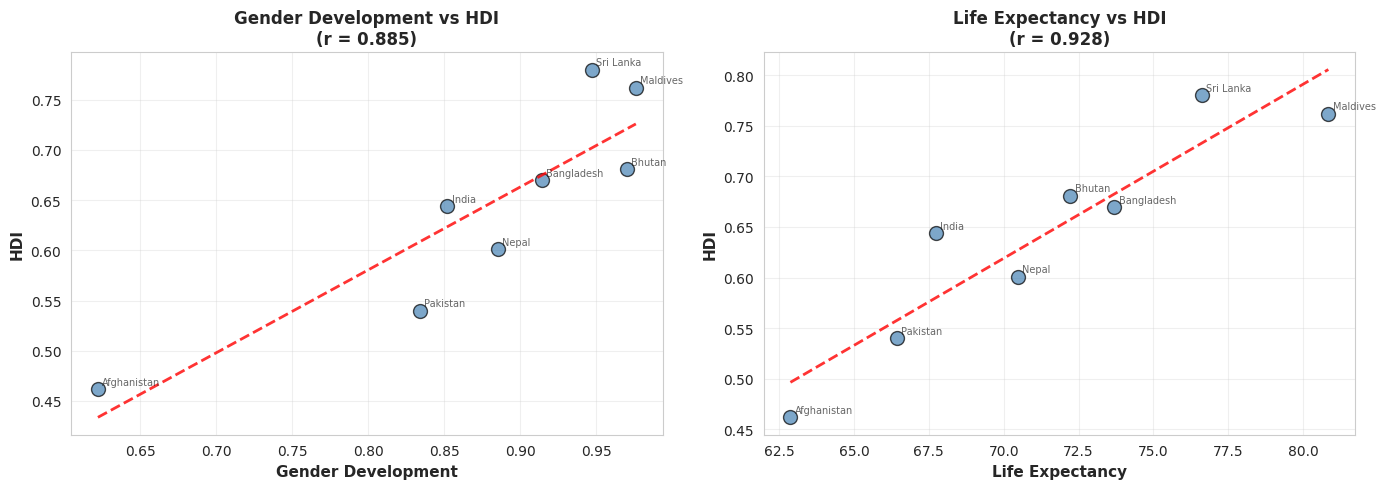


--- Pearson Correlations with HDI ---
Gender Development: 0.8848
 Strong positive correlation
Life Expectancy: 0.9282
 Strong positive correlation

 STRONGEST relationship: Life Expectancy (r = 0.9282)
 WEAKEST relationship: Gender Development (r = 0.8848)


In [83]:
# ============================================================================
# PROBLEM 2 - TASK 4 (Metric Relationships)
# ============================================================================
print("\n--- Task 4: Exploring Metric Relationships ---")

# Check available metrics
available_metrics = []
if 'gender_development' in sa_latest.columns:
    available_metrics.append('gender_development')
if 'life_expectancy' in sa_latest.columns:
    available_metrics.append('life_expectancy')

print(f" Available metrics for correlation: {available_metrics}")

if len(available_metrics) >= 2:
    metrics = available_metrics[:2]
    correlations = {}

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    for idx, metric in enumerate(metrics):
        clean_data = sa_latest.dropna(subset=[metric, 'hdi'])

        if len(clean_data) > 1:
            # Calculate correlation
            corr = clean_data[metric].corr(clean_data['hdi'])
            correlations[metric] = corr

            # Scatter plot
            axes[idx].scatter(clean_data[metric], clean_data['hdi'],
                            alpha=0.7, s=100, color='steelblue', edgecolors='black')

            # Add trendline
            if len(clean_data) > 2:
                z = np.polyfit(clean_data[metric], clean_data['hdi'], 1)
                p = np.poly1d(z)
                x_line = np.linspace(clean_data[metric].min(), clean_data[metric].max(), 100)
                axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

            # Annotate points
            for _, row in clean_data.iterrows():
                axes[idx].annotate(row['country'],
                                  (row[metric], row['hdi']),
                                  xytext=(3, 3), textcoords='offset points',
                                  fontsize=7, alpha=0.7)

            axes[idx].set_xlabel(metric.replace('_', ' ').title(), fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('HDI', fontsize=11, fontweight='bold')
            axes[idx].set_title(f'{metric.replace("_", " ").title()} vs HDI\n(r = {corr:.3f})',
                               fontsize=12, fontweight='bold')
            axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('metric_relationships.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Display correlation results
    print("\n--- Pearson Correlations with HDI ---")
    for metric, corr in correlations.items():
        print(f"{metric.replace('_', ' ').title()}: {corr:.4f}")
        if abs(corr) > 0.7:
            strength = "Strong"
        elif abs(corr) > 0.4:
            strength = "Moderate"
        else:
            strength = "Weak"
        print(f" {strength} {'positive' if corr > 0 else 'negative'} correlation")

    if correlations:
        strongest = max(correlations, key=lambda k: abs(correlations[k]))
        weakest = min(correlations, key=lambda k: abs(correlations[k]))
        print(f"\n STRONGEST relationship: {strongest.replace('_', ' ').title()} (r = {correlations[strongest]:.4f})")
        print(f" WEAKEST relationship: {weakest.replace('_', ' ').title()} (r = {correlations[weakest]:.4f})")
else:
    print(" Insufficient metrics available for correlation analysis")




--- Task 5: Gap Analysis ---

--- Gap Analysis Results ---

Top 3 POSITIVE Gaps (High GNI relative to HDI):


,country,gross_inc_percap,hdi,GNI_HDI_Gap
3530,Maldives,18846.79219,0.762,0.238000
659,Bhutan,10624.87388,0.681,-0.150513
5477,Sri Lanka,11899.49847,0.780,-0.176726



Top 3 NEGATIVE Gaps (High HDI relative to GNI):


,country,gross_inc_percap,hdi,GNI_HDI_Gap
461,Bangladesh,6511.122178,0.670,-0.374429
4091,Nepal,4025.554685,0.601,-0.447367
32,Afghanistan,1335.205733,0.462,-0.462000


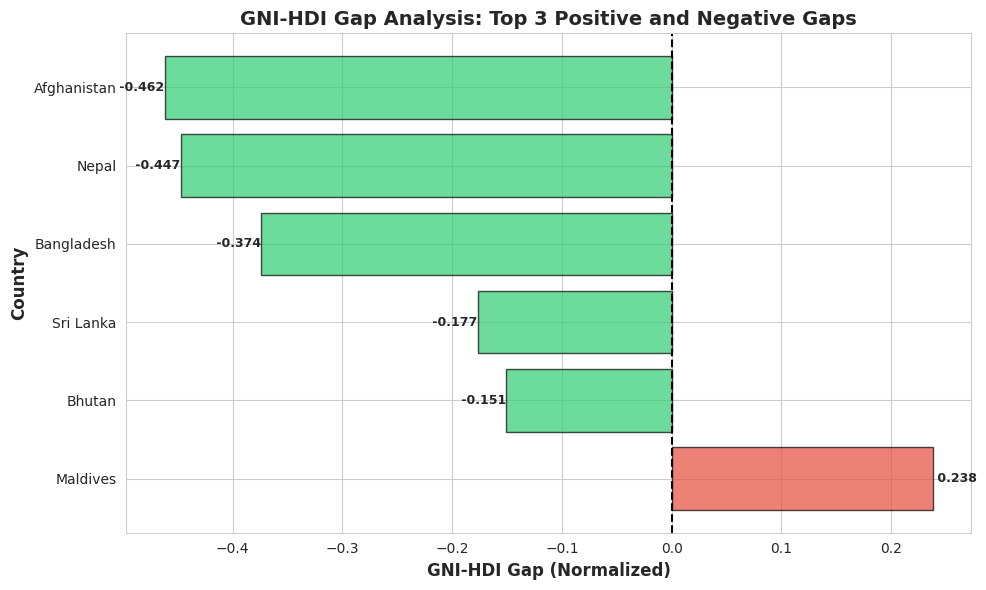


--- Gap Implications ---

 POSITIVE GAPS (Red bars):
 High income but lower-than-expected HDI
Potential issues: Inequality, inefficient resource allocation,
weak social services, income not translating to health/education

 NEGATIVE GAPS (Green bars):
 High HDI despite lower income
Positive indicators: Efficient development, strong public sector,
 good social policies, equitable resource distribution


In [84]:
# ============================================================================
# PROBLEM 2 - TASK 5 (Gap Analysis)
# ============================================================================
print("\n--- Task 5: Gap Analysis ---")

if 'gross_inc_percap' in sa_latest.columns and 'hdi' in sa_latest.columns:
    # Calculate GNI-HDI Gap
    # Note: Need to normalize since they're on different scales
    sa_gap = sa_latest.dropna(subset=['gross_inc_percap', 'hdi']).copy()

    # Normalize GNI to 0-1 scale for fair comparison
    gni_normalized = ((sa_gap['gross_inc_percap'] - sa_gap['gross_inc_percap'].min()) /
                      (sa_gap['gross_inc_percap'].max() - sa_gap['gross_inc_percap'].min()))

    sa_gap['GNI_HDI_Gap'] = gni_normalized - sa_gap['hdi']

    # Rank by gap
    sa_gap_sorted = sa_gap.sort_values('GNI_HDI_Gap', ascending=False)

    print("\n--- Gap Analysis Results ---")
    print("\nTop 3 POSITIVE Gaps (High GNI relative to HDI):")
    top_3_pos = sa_gap_sorted.head(3)
    display(top_3_pos[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']])

    print("\nTop 3 NEGATIVE Gaps (High HDI relative to GNI):")
    top_3_neg = sa_gap_sorted.tail(3)
    display(top_3_neg[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']])

    # Plot
    combined = pd.concat([top_3_pos, top_3_neg])

    plt.figure(figsize=(10, 6))
    colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in combined['GNI_HDI_Gap']]
    bars = plt.barh(combined['country'], combined['GNI_HDI_Gap'], color=colors, alpha=0.7, edgecolor='black')

    plt.xlabel('GNI-HDI Gap (Normalized)', fontsize=12, fontweight='bold')
    plt.ylabel('Country', fontsize=12, fontweight='bold')
    plt.title('GNI-HDI Gap Analysis: Top 3 Positive and Negative Gaps', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f' {width:.3f}', ha='left' if width > 0 else 'right',
                va='center', fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.savefig('gni_hdi_gap.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n--- Gap Implications ---")
    print("\n POSITIVE GAPS (Red bars):")
    print(" High income but lower-than-expected HDI")
    print("Potential issues: Inequality, inefficient resource allocation,")
    print("weak social services, income not translating to health/education")

    print("\n NEGATIVE GAPS (Green bars):")
    print(" High HDI despite lower income")
    print("Positive indicators: Efficient development, strong public sector,")
    print(" good social policies, equitable resource distribution")
else:
    print("Required columns not available for gap analysis")


In [85]:
# ============================================================================
# PROBLEM 3 - TASK 1 (Middle East Subset)
# ============================================================================
print("\n" + "="*80)
print("PROBLEM 3: Comparative Regional Analysis - South Asia vs Middle East")
print("="*80)
print("\n--- Task 1: Create Middle East Subset ---")

# Define Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Load Problem 1B dataset
hdi_1b_loaded = pd.read_csv('HDI_problem1B.csv')
print(" Loaded HDI_problem1B.csv")

# Create subsets
sa_2020_2022 = hdi_1b_loaded[hdi_1b_loaded['country'].isin(south_asian_countries)].copy()
me_2020_2022 = hdi_1b_loaded[hdi_1b_loaded['country'].isin(middle_east_countries)].copy()

print(f"\n South Asia (2020-2022) rows: {len(sa_2020_2022)}")
print(f" Countries: {list(sa_2020_2022['country'].unique())}")
print(f"\n Middle East (2020-2022) rows: {len(me_2020_2022)}")
print(f"  Countries: {list(me_2020_2022['country'].unique())}")

# Save datasets
sa_2020_2022.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
me_2020_2022.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)
files.download('HDI_SouthAsia_2020_2022.csv')
files.download('HDI_MiddleEast_2020_2022.csv')



PROBLEM 3: Comparative Regional Analysis - South Asia vs Middle East

--- Task 1: Create Middle East Subset ---
 Loaded HDI_problem1B.csv

 South Asia (2020-2022) rows: 24
 Countries: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

 Middle East (2020-2022) rows: 33
  Countries: ['Bahrain', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
# ============================================================================
# PROBLEM 3 - TASK 2 (Descriptive Statistics)
# ============================================================================
print("\n--- Task 2: Descriptive Statistics ---")

# Calculate statistics for each region
sa_stats = sa_2020_2022['hdi'].agg(['mean', 'std', 'min', 'max'])
me_stats = me_2020_2022['hdi'].agg(['mean', 'std', 'min', 'max'])

print("\n--- Regional HDI Statistics (2020-2022) ---")
print("\nSOUTH ASIA:")
print(f"  Mean HDI: {sa_stats['mean']:.4f}")
print(f"  Std Dev: {sa_stats['std']:.4f}")
print(f"  Min: {sa_stats['min']:.4f}")
print(f"  Max: {sa_stats['max']:.4f}")

print("\nMIDDLE EAST:")
print(f"  Mean HDI: {me_stats['mean']:.4f}")
print(f"  Std Dev: {me_stats['std']:.4f}")
print(f"  Min: {me_stats['min']:.4f}")
print(f"  Max: {me_stats['max']:.4f}")

# Comparison
print("\n--- Performance Comparison ---")
if sa_stats['mean'] > me_stats['mean']:
    print(f" South Asia performs BETTER on average")
    diff = ((sa_stats['mean'] - me_stats['mean']) / me_stats['mean']) * 100
    print(f"  Difference: +{diff:.2f}%")
else:
    print(f" Middle East performs BETTER on average")
    diff = ((me_stats['mean'] - sa_stats['mean']) / sa_stats['mean']) * 100
    print(f"  Difference: +{diff:.2f}%")

# Create comparison table
comparison_df = pd.DataFrame({
    'South Asia': sa_stats,
    'Middle East': me_stats
})
display(comparison_df)



--- Task 2: Descriptive Statistics ---

--- Regional HDI Statistics (2020-2022) ---

SOUTH ASIA:
  Mean HDI: 0.6396
  Std Dev: 0.0983
  Min: 0.4620
  Max: 0.7830

MIDDLE EAST:
  Mean HDI: 0.7889
  Std Dev: 0.1413
  Min: 0.4240
  Max: 0.9370

--- Performance Comparison ---
 Middle East performs BETTER on average
  Difference: +23.35%


,South Asia,Middle East
mean,0.639583,0.788909
std,0.098273,0.141295
min,0.462000,0.424000
max,0.783000,0.937000



--- Task 3: Top and Bottom Performers ---

SOUTH ASIA:

Top 3:


,hdi
country,
Sri Lanka,0.780000
Maldives,0.750667
Bhutan,0.677667



Bottom 3:


,hdi
country,
Nepal,0.595000
Pakistan,0.537667
Afghanistan,0.474333



MIDDLE EAST:

Top 3:


,hdi
country,
United Arab Emirates,0.932667
Israel,0.910667
Bahrain,0.885333



Bottom 3:


,hdi
country,
Lebanon,0.730000
Iraq,0.667000
Yemen,0.426333


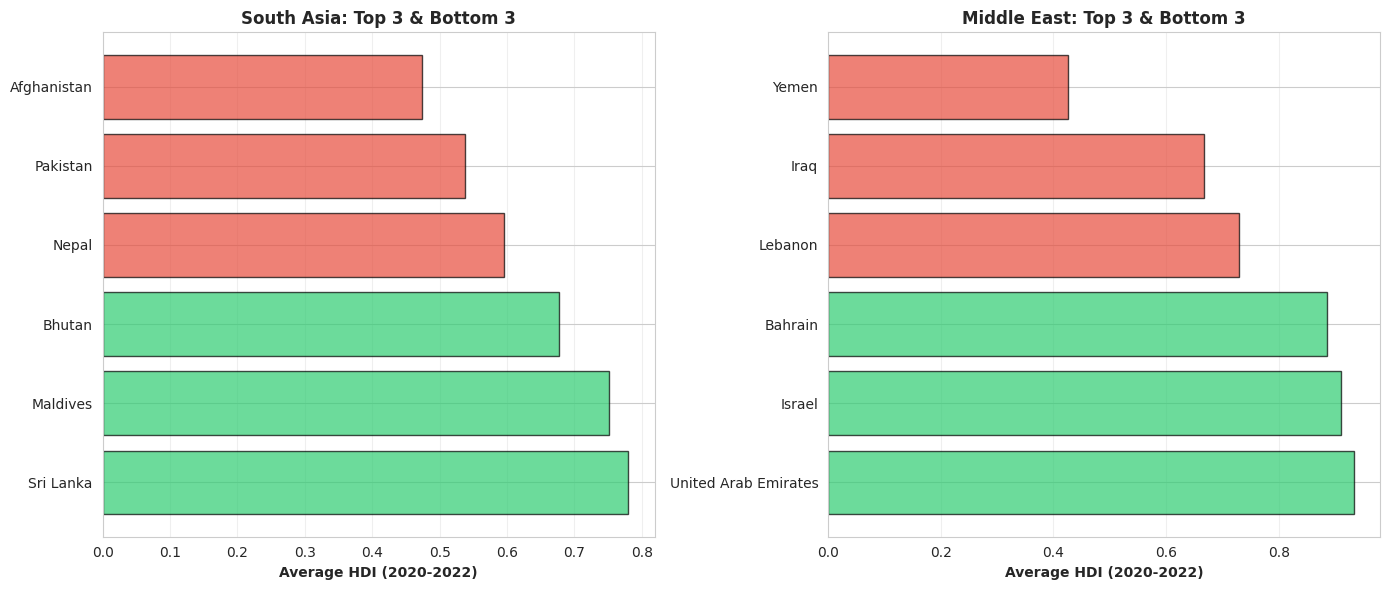

In [87]:
# ============================================================================
# PROBLEM 3 - TASK 3 (Top and Bottom Performers)
# ============================================================================
print("\n--- Task 3: Top and Bottom Performers ---")

# Get average HDI by country across 2020-2022
sa_avg = sa_2020_2022.groupby('country')['hdi'].mean().sort_values(ascending=False)
me_avg = me_2020_2022.groupby('country')['hdi'].mean().sort_values(ascending=False)

print("\nSOUTH ASIA:")
print("\nTop 3:")
display(sa_avg.head(3))
print("\nBottom 3:")
display(sa_avg.tail(3))

print("\nMIDDLE EAST:")
print("\nTop 3:")
display(me_avg.head(3))
print("\nBottom 3:")
display(me_avg.tail(3))

# Create comparative bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# South Asia
sa_top_bottom = pd.concat([sa_avg.head(3), sa_avg.tail(3)])
colors_sa = ['#2ecc71']*3 + ['#e74c3c']*3
ax1.barh(range(len(sa_top_bottom)), sa_top_bottom.values, color=colors_sa, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(sa_top_bottom)))
ax1.set_yticklabels(sa_top_bottom.index)
ax1.set_xlabel('Average HDI (2020-2022)', fontweight='bold')
ax1.set_title('South Asia: Top 3 & Bottom 3', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Middle East
me_top_bottom = pd.concat([me_avg.head(3), me_avg.tail(3)])
colors_me = ['#2ecc71']*3 + ['#e74c3c']*3
ax2.barh(range(len(me_top_bottom)), me_top_bottom.values, color=colors_me, alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(me_top_bottom)))
ax2.set_yticklabels(me_top_bottom.index)
ax2.set_xlabel('Average HDI (2020-2022)', fontweight='bold')
ax2.set_title('Middle East: Top 3 & Bottom 3', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('top_bottom_performers_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


--- Task 4: Metric Comparisons ---
Comparing metrics: ['gender_development', 'life_expectancy', 'gross_inc_percap']

Metric Comparison Summary:


,Metric,South Asia,Middle East,Difference,Percent_Diff
0,Gender Development,0.881458,0.896545,0.015087,1.711609
1,Life Expectancy,70.970083,75.855455,4.885371,6.883705
2,Gross Inc Percap,7766.509931,37750.770520,29984.260588,386.071232



 GREATEST DISPARITY: Gross Inc Percap
  Percent difference: 386.07%


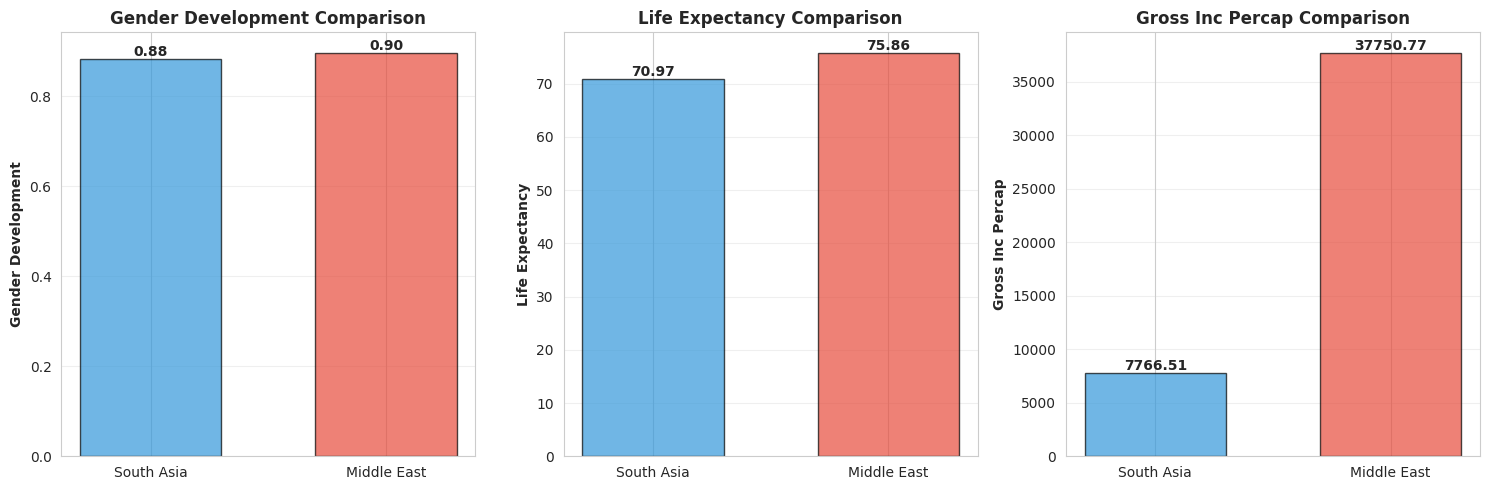


--- Task 5: HDI Disparity ---

--- Variation Metrics ---

SOUTH ASIA:
  Range (Max - Min): 0.3210
  Coefficient of Variation: 15.37%

MIDDLE EAST:
  Range (Max - Min): 0.5130
  Coefficient of Variation: 17.91%

--- Variation Analysis ---
MIDDLE EAST exhibits MORE variation (CV = 17.91%)
South Asia CV = 15.37%
Difference: 2.54 percentage points

Interpretation:
Higher CV indicates more heterogeneous development levels within the region.
This could be due to:
 Economic diversity (resource-rich vs resource-poor countries)
 Different political systems and governance quality
 Varying levels of conflict or stability
 Historical development trajectories


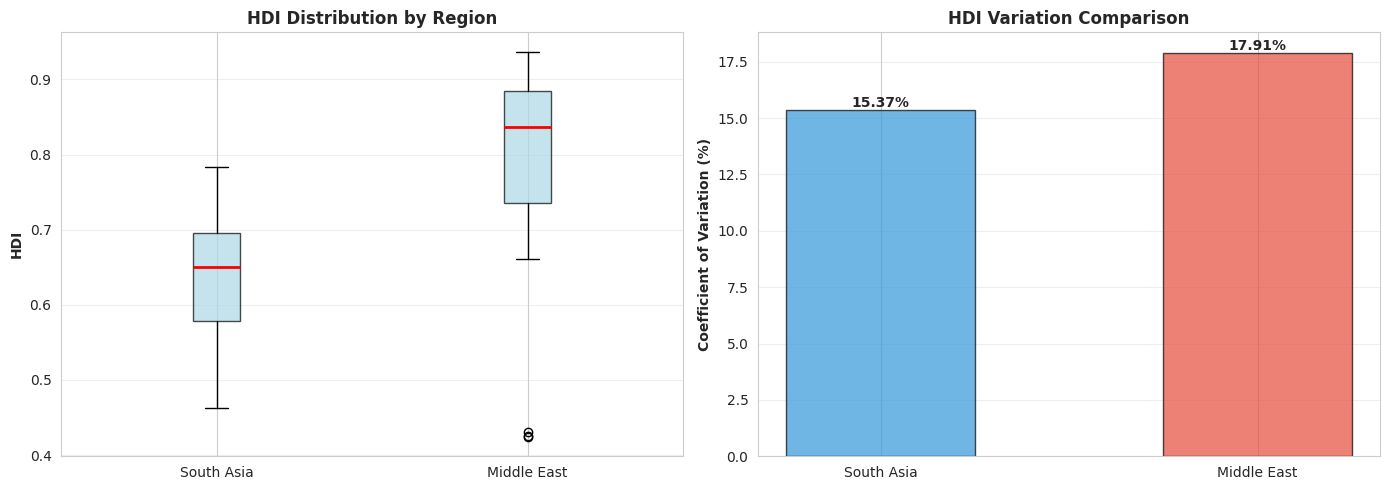

In [88]:
# ============================================================================
# PROBLEM 3 - TASK 4 (Metric Comparisons)
# ============================================================================
print("\n--- Task 4: Metric Comparisons ---")

# Metrics to compare
metrics_to_compare = ['gender_development', 'life_expectancy', 'gross_inc_percap']
available_metrics_compare = [m for m in metrics_to_compare if m in sa_2020_2022.columns and m in me_2020_2022.columns]

print(f"Comparing metrics: {available_metrics_compare}")

if len(available_metrics_compare) > 0:
    # Calculate averages
    comparison_data = []

    for metric in available_metrics_compare:
        sa_mean = sa_2020_2022[metric].mean()
        me_mean = me_2020_2022[metric].mean()
        comparison_data.append({
            'Metric': metric.replace('_', ' ').title(),
            'South Asia': sa_mean,
            'Middle East': me_mean,
            'Difference': abs(me_mean - sa_mean),
            'Percent_Diff': abs((me_mean - sa_mean) / sa_mean * 100) if sa_mean != 0 else 0
        })

    comparison_df = pd.DataFrame(comparison_data)
    print("\nMetric Comparison Summary:")
    display(comparison_df)

    # Identify greatest disparity
    greatest_disparity = comparison_df.loc[comparison_df['Percent_Diff'].idxmax()]
    print(f"\n GREATEST DISPARITY: {greatest_disparity['Metric']}")
    print(f"  Percent difference: {greatest_disparity['Percent_Diff']:.2f}%")

    # Create grouped bar charts
    fig, axes = plt.subplots(1, len(available_metrics_compare), figsize=(5*len(available_metrics_compare), 5))

    if len(available_metrics_compare) == 1:
        axes = [axes]

    for idx, metric in enumerate(available_metrics_compare):
        sa_mean = sa_2020_2022[metric].mean()
        me_mean = me_2020_2022[metric].mean()

        axes[idx].bar(['South Asia', 'Middle East'], [sa_mean, me_mean],
                     color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', width=0.6)
        axes[idx].set_ylabel(metric.replace('_', ' ').title(), fontweight='bold')
        axes[idx].set_title(f'{metric.replace("_", " ").title()} Comparison', fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels
        for i, v in enumerate([sa_mean, me_mean]):
            axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('metric_comparisons_regional.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print(" No common metrics available for comparison")# ============================================================================
#PROBLEM 3 - TASK 5 (HDI Disparity)
# ============================================================================
print("\n--- Task 5: HDI Disparity ---")

# Calculate range
sa_range = sa_2020_2022['hdi'].max() - sa_2020_2022['hdi'].min()
me_range = me_2020_2022['hdi'].max() - me_2020_2022['hdi'].min()

# Calculate coefficient of variation
sa_cv = (sa_2020_2022['hdi'].std() / sa_2020_2022['hdi'].mean()) * 100
me_cv = (me_2020_2022['hdi'].std() / me_2020_2022['hdi'].mean()) * 100

print("\n--- Variation Metrics ---")
print("\nSOUTH ASIA:")
print(f"  Range (Max - Min): {sa_range:.4f}")
print(f"  Coefficient of Variation: {sa_cv:.2f}%")

print("\nMIDDLE EAST:")
print(f"  Range (Max - Min): {me_range:.4f}")
print(f"  Coefficient of Variation: {me_cv:.2f}%")

# Determine which has more variation
print("\n--- Variation Analysis ---")
if sa_cv > me_cv:
    print(f"SOUTH ASIA exhibits MORE variation (CV = {sa_cv:.2f}%)")
    print(f"Middle East CV = {me_cv:.2f}%")
    print(f"Difference: {sa_cv - me_cv:.2f} percentage points")
else:
    print(f"MIDDLE EAST exhibits MORE variation (CV = {me_cv:.2f}%)")
    print(f"South Asia CV = {sa_cv:.2f}%")
    print(f"Difference: {me_cv - sa_cv:.2f} percentage points")

print("\nInterpretation:")
print("Higher CV indicates more heterogeneous development levels within the region.")
print("This could be due to:")
print(" Economic diversity (resource-rich vs resource-poor countries)")
print(" Different political systems and governance quality")
print(" Varying levels of conflict or stability")
print(" Historical development trajectories")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plots
ax1.boxplot([sa_2020_2022['hdi'].dropna(), me_2020_2022['hdi'].dropna()],
            labels=['South Asia', 'Middle East'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax1.set_ylabel('HDI', fontweight='bold')
ax1.set_title('HDI Distribution by Region', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Bar chart of CV
ax2.bar(['South Asia', 'Middle East'], [sa_cv, me_cv],
       color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', width=0.5)
ax2.set_ylabel('Coefficient of Variation (%)', fontweight='bold')
ax2.set_title('HDI Variation Comparison', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate([sa_cv, me_cv]):
    ax2.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('hdi_disparity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()




--- Task 6: Correlation Analysis ---
 Analyzing correlations for: ['gender_development', 'life_expectancy']

--- Correlation Results ---

SOUTH ASIA:
  Gender Development: r = 0.8742
  Life Expectancy: r = 0.9388

MIDDLE EAST:
  Gender Development: r = 0.9357
  Life Expectancy: r = 0.9331


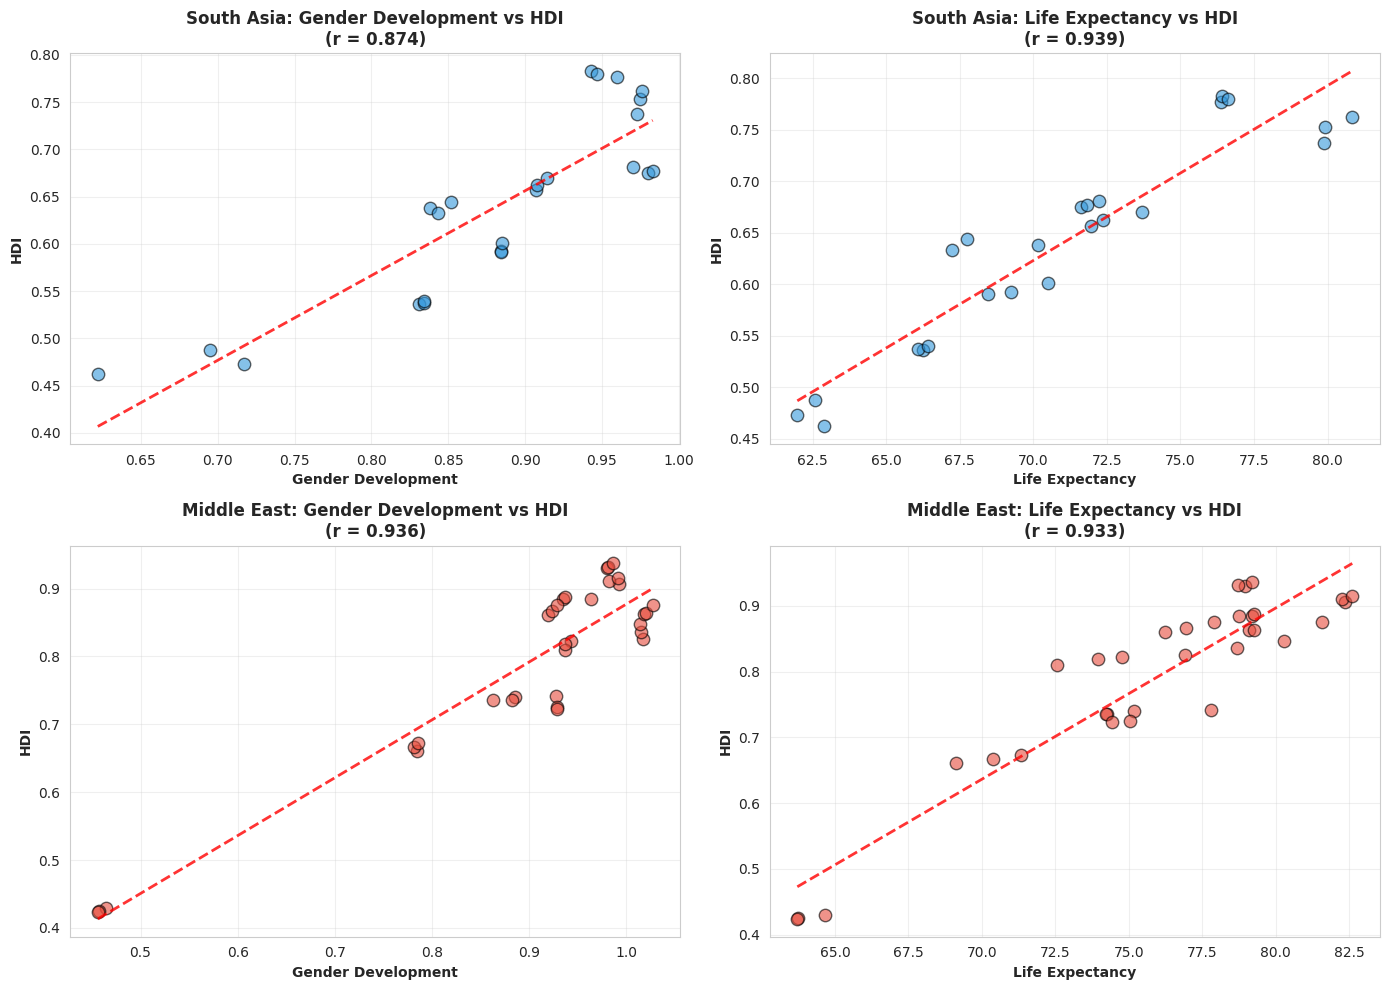


--- Interpretation ---

STRENGTH AND DIRECTION:

Gender Development:
  South Asia: Strong positive correlation (r = 0.874)
  Middle East: Strong positive correlation (r = 0.936)
  → Stronger relationship in MIDDLE EAST

Life Expectancy:
  South Asia: Strong positive correlation (r = 0.939)
  Middle East: Strong positive correlation (r = 0.933)
  → Stronger relationship in SOUTH ASIA

 Correlation analysis complete!


In [89]:
# ============================================================================
#PROBLEM 3 - TASK 6 (Correlation Analysis)
# ============================================================================
print("\n--- Task 6: Correlation Analysis ---")

# Metrics for correlation
corr_metrics = ['gender_development', 'life_expectancy']
available_corr = [m for m in corr_metrics if m in sa_2020_2022.columns and m in me_2020_2022.columns]

print(f" Analyzing correlations for: {available_corr}")

if len(available_corr) > 0:
    # Calculate correlations for each region
    sa_correlations = {}
    me_correlations = {}

    for metric in available_corr:
        sa_clean = sa_2020_2022.dropna(subset=[metric, 'hdi'])
        me_clean = me_2020_2022.dropna(subset=[metric, 'hdi'])

        if len(sa_clean) > 1:
            sa_correlations[metric] = sa_clean[metric].corr(sa_clean['hdi'])
        if len(me_clean) > 1:
            me_correlations[metric] = me_clean[metric].corr(me_clean['hdi'])

    # Display results
    print("\n--- Correlation Results ---")
    print("\nSOUTH ASIA:")
    for metric, corr in sa_correlations.items():
        print(f"  {metric.replace('_', ' ').title()}: r = {corr:.4f}")

    print("\nMIDDLE EAST:")
    for metric, corr in me_correlations.items():
        print(f"  {metric.replace('_', ' ').title()}: r = {corr:.4f}")

    # Create scatter plots
    fig, axes = plt.subplots(2, len(available_corr), figsize=(7*len(available_corr), 10))

    if len(available_corr) == 1:
        axes = axes.reshape(-1, 1)

    for idx, metric in enumerate(available_corr):
        # South Asia
        sa_clean = sa_2020_2022.dropna(subset=[metric, 'hdi'])
        axes[0, idx].scatter(sa_clean[metric], sa_clean['hdi'],
                            alpha=0.6, s=80, color='#3498db', edgecolors='black')

        if len(sa_clean) > 2:
            z = np.polyfit(sa_clean[metric], sa_clean['hdi'], 1)
            p = np.poly1d(z)
            x_line = np.linspace(sa_clean[metric].min(), sa_clean[metric].max(), 100)
            axes[0, idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

        axes[0, idx].set_xlabel(metric.replace('_', ' ').title(), fontweight='bold')
        axes[0, idx].set_ylabel('HDI', fontweight='bold')
        axes[0, idx].set_title(f'South Asia: {metric.replace("_", " ").title()} vs HDI\n(r = {sa_correlations.get(metric, 0):.3f})',
                              fontweight='bold')
        axes[0, idx].grid(True, alpha=0.3)

        # Middle East
        me_clean = me_2020_2022.dropna(subset=[metric, 'hdi'])
        axes[1, idx].scatter(me_clean[metric], me_clean['hdi'],
                            alpha=0.6, s=80, color='#e74c3c', edgecolors='black')

        if len(me_clean) > 2:
            z = np.polyfit(me_clean[metric], me_clean['hdi'], 1)
            p = np.poly1d(z)
            x_line = np.linspace(me_clean[metric].min(), me_clean[metric].max(), 100)
            axes[1, idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)

        axes[1, idx].set_xlabel(metric.replace('_', ' ').title(), fontweight='bold')
        axes[1, idx].set_ylabel('HDI', fontweight='bold')
        axes[1, idx].set_title(f'Middle East: {metric.replace("_", " ").title()} vs HDI\n(r = {me_correlations.get(metric, 0):.3f})',
                              fontweight='bold')
        axes[1, idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('correlation_analysis_regional.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Interpretation
    print("\n--- Interpretation ---")
    print("\nSTRENGTH AND DIRECTION:")

    for metric in available_corr:
        sa_corr = sa_correlations.get(metric, 0)
        me_corr = me_correlations.get(metric, 0)

        print(f"\n{metric.replace('_', ' ').title()}:")

        # South Asia interpretation
        if abs(sa_corr) > 0.7:
            sa_strength = "Strong"
        elif abs(sa_corr) > 0.4:
            sa_strength = "Moderate"
        else:
            sa_strength = "Weak"
        sa_direction = "positive" if sa_corr > 0 else "negative"
        print(f"  South Asia: {sa_strength} {sa_direction} correlation (r = {sa_corr:.3f})")

        # Middle East interpretation
        if abs(me_corr) > 0.7:
            me_strength = "Strong"
        elif abs(me_corr) > 0.4:
            me_strength = "Moderate"
        else:
            me_strength = "Weak"
        me_direction = "positive" if me_corr > 0 else "negative"
        print(f"  Middle East: {me_strength} {me_direction} correlation (r = {me_corr:.3f})")

        # Comparison
        if abs(sa_corr) > abs(me_corr):
            print(f"  → Stronger relationship in SOUTH ASIA")
        else:
            print(f"  → Stronger relationship in MIDDLE EAST")

    print("\n Correlation analysis complete!")
else:
    print(" No metrics available for correlation analysis")


--- Task 7: Outlier Detection by Region ---

--- SOUTH ASIA Outlier Detection ---

HDI Outliers:
  Bounds: [0.4031, 0.8701]
  Outliers found: 0

GNI per Capita Outliers:
  Bounds: [-4688.78, 20322.91]
  Outliers found: 0

--- MIDDLE EAST Outlier Detection ---

HDI Outliers:
  Bounds: [0.5140, 1.1060]
  Outliers found: 3


,country,year,hdi
568,Yemen,2020,0.43



GNI per Capita Outliers:
  Bounds: [-52693.65, 112608.89]
  Outliers found: 0


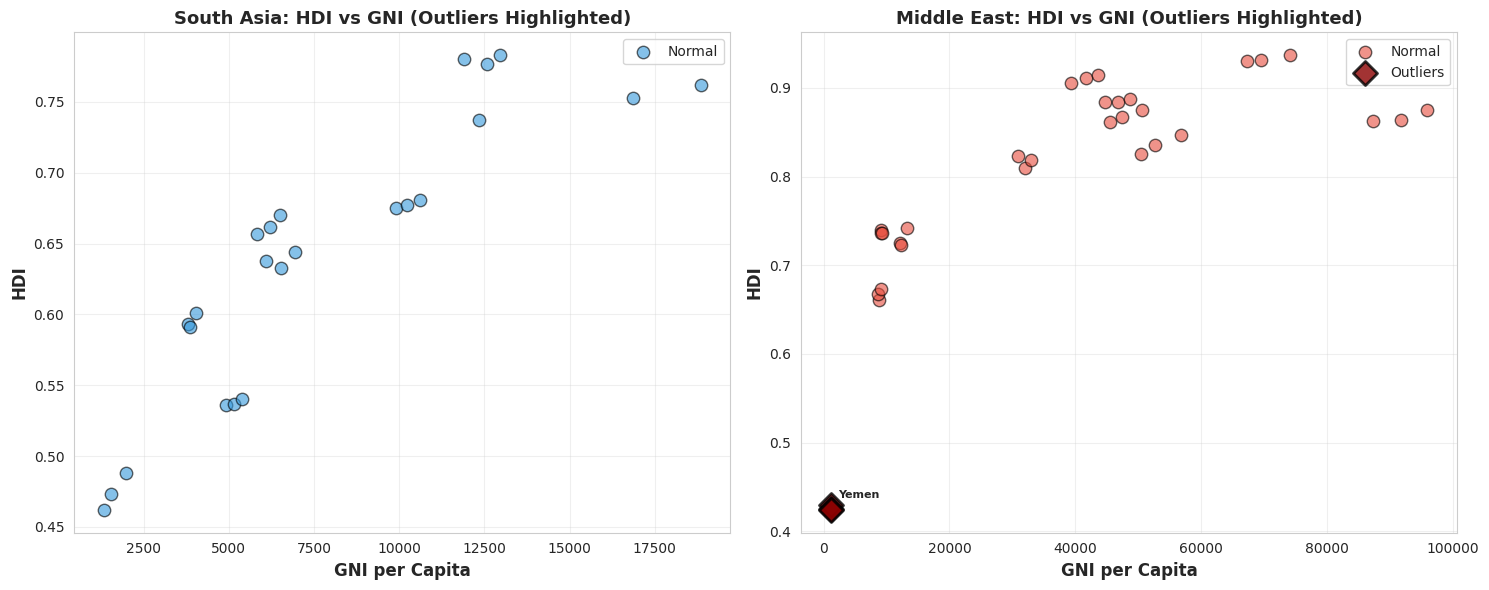

 Regional outlier visualization saved!

--- Significance of Outliers ---

SOUTH ASIA OUTLIERS:
• Countries deviating from regional norms may have:
  - Unique economic structures (e.g., tourism-dependent, resource-rich)
  - Recent conflicts or political instability
  - Exceptionally effective or ineffective governance
  - Geographic advantages or disadvantages

MIDDLE EAST OUTLIERS:
• Oil-rich nations often show high GNI but varying HDI
• Conflict-affected countries may have depressed HDI despite historical wealth
• Small, wealthy states may achieve very high development levels
• Countries with large refugee populations may face development challenges

COMPARATIVE INSIGHTS:
• Outliers reveal alternative development pathways
• They highlight the complexity beyond simple income-development relationships
• Understanding outliers helps identify best practices and warning signs
• Regional context matters: what's "normal" differs between regions



In [90]:
# ============================================================================
# PROBLEM 3 - TASK 7 (Regional Outlier Detection)
# ============================================================================
print("\n--- Task 7: Outlier Detection by Region ---")

def detect_outliers_iqr(data, column):
    """Detect outliers using 1.5 × IQR rule"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for both regions
print("\n--- SOUTH ASIA Outlier Detection ---")

# HDI outliers
sa_hdi_clean = sa_2020_2022.dropna(subset=['hdi'])
if len(sa_hdi_clean) > 3:
    sa_hdi_outliers, sa_hdi_lower, sa_hdi_upper = detect_outliers_iqr(sa_hdi_clean, 'hdi')
    print(f"\nHDI Outliers:")
    print(f"  Bounds: [{sa_hdi_lower:.4f}, {sa_hdi_upper:.4f}]")
    print(f"  Outliers found: {len(sa_hdi_outliers)}")
    if len(sa_hdi_outliers) > 0:
        display(sa_hdi_outliers[['country', 'year', 'hdi']].drop_duplicates('country'))

# GNI outliers
if 'gross_inc_percap' in sa_2020_2022.columns:
    sa_gni_clean = sa_2020_2022.dropna(subset=['gross_inc_percap'])
    if len(sa_gni_clean) > 3:
        sa_gni_outliers, sa_gni_lower, sa_gni_upper = detect_outliers_iqr(sa_gni_clean, 'gross_inc_percap')
        print(f"\nGNI per Capita Outliers:")
        print(f"  Bounds: [{sa_gni_lower:.2f}, {sa_gni_upper:.2f}]")
        print(f"  Outliers found: {len(sa_gni_outliers)}")
        if len(sa_gni_outliers) > 0:
            display(sa_gni_outliers[['country', 'year', 'gross_inc_percap']].drop_duplicates('country'))

print("\n--- MIDDLE EAST Outlier Detection ---")

# HDI outliers
me_hdi_clean = me_2020_2022.dropna(subset=['hdi'])
if len(me_hdi_clean) > 3:
    me_hdi_outliers, me_hdi_lower, me_hdi_upper = detect_outliers_iqr(me_hdi_clean, 'hdi')
    print(f"\nHDI Outliers:")
    print(f"  Bounds: [{me_hdi_lower:.4f}, {me_hdi_upper:.4f}]")
    print(f"  Outliers found: {len(me_hdi_outliers)}")
    if len(me_hdi_outliers) > 0:
        display(me_hdi_outliers[['country', 'year', 'hdi']].drop_duplicates('country'))

# GNI outliers
if 'gross_inc_percap' in me_2020_2022.columns:
    me_gni_clean = me_2020_2022.dropna(subset=['gross_inc_percap'])
    if len(me_gni_clean) > 3:
        me_gni_outliers, me_gni_lower, me_gni_upper = detect_outliers_iqr(me_gni_clean, 'gross_inc_percap')
        print(f"\nGNI per Capita Outliers:")
        print(f"  Bounds: [{me_gni_lower:.2f}, {me_gni_upper:.2f}]")
        print(f"  Outliers found: {len(me_gni_outliers)}")
        if len(me_gni_outliers) > 0:
            display(me_gni_outliers[['country', 'year', 'gross_inc_percap']].drop_duplicates('country'))

# Create scatter plots with outliers highlighted
if 'gross_inc_percap' in sa_2020_2022.columns and 'gross_inc_percap' in me_2020_2022.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # South Asia
    sa_plot_data = sa_2020_2022.dropna(subset=['hdi', 'gross_inc_percap']).copy()
    sa_plot_data['is_outlier'] = False

    # Mark outliers
    for idx, row in sa_plot_data.iterrows():
        if (row['hdi'] < sa_hdi_lower or row['hdi'] > sa_hdi_upper or
            row['gross_inc_percap'] < sa_gni_lower or row['gross_inc_percap'] > sa_gni_upper):
            sa_plot_data.at[idx, 'is_outlier'] = True

    # Plot normal points
    normal_sa = sa_plot_data[~sa_plot_data['is_outlier']]
    ax1.scatter(normal_sa['gross_inc_percap'], normal_sa['hdi'],
                c='#3498db', alpha=0.6, s=80, label='Normal', edgecolors='black')

    # Plot outliers
    outlier_sa = sa_plot_data[sa_plot_data['is_outlier']]
    if len(outlier_sa) > 0:
        ax1.scatter(outlier_sa['gross_inc_percap'], outlier_sa['hdi'],
                    c='red', alpha=0.8, s=150, marker='D', label='Outliers',
                    edgecolors='darkred', linewidth=2)

        # Annotate outliers
        for _, row in outlier_sa.drop_duplicates('country').iterrows():
            ax1.annotate(row['country'],
                        (row['gross_inc_percap'], row['hdi']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, fontweight='bold')

    ax1.set_xlabel('GNI per Capita', fontsize=12, fontweight='bold')
    ax1.set_ylabel('HDI', fontsize=12, fontweight='bold')
    ax1.set_title('South Asia: HDI vs GNI (Outliers Highlighted)', fontsize=13, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Middle East
    me_plot_data = me_2020_2022.dropna(subset=['hdi', 'gross_inc_percap']).copy()
    me_plot_data['is_outlier'] = False

    # Mark outliers
    for idx, row in me_plot_data.iterrows():
        if (row['hdi'] < me_hdi_lower or row['hdi'] > me_hdi_upper or
            row['gross_inc_percap'] < me_gni_lower or row['gross_inc_percap'] > me_gni_upper):
            me_plot_data.at[idx, 'is_outlier'] = True

    # Plot normal points
    normal_me = me_plot_data[~me_plot_data['is_outlier']]
    ax2.scatter(normal_me['gross_inc_percap'], normal_me['hdi'],
                c='#e74c3c', alpha=0.6, s=80, label='Normal', edgecolors='black')

    # Plot outliers
    outlier_me = me_plot_data[me_plot_data['is_outlier']]
    if len(outlier_me) > 0:
        ax2.scatter(outlier_me['gross_inc_percap'], outlier_me['hdi'],
                    c='darkred', alpha=0.8, s=150, marker='D', label='Outliers',
                    edgecolors='black', linewidth=2)

        # Annotate outliers
        for _, row in outlier_me.drop_duplicates('country').iterrows():
            ax2.annotate(row['country'],
                        (row['gross_inc_percap'], row['hdi']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, fontweight='bold')

    ax2.set_xlabel('GNI per Capita', fontsize=12, fontweight='bold')
    ax2.set_ylabel('HDI', fontsize=12, fontweight='bold')
    ax2.set_title('Middle East: HDI vs GNI (Outliers Highlighted)', fontsize=13, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('regional_outliers_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Regional outlier visualization saved!")

# Significance discussion
print("\n--- Significance of Outliers ---")
print("""
SOUTH ASIA OUTLIERS:
• Countries deviating from regional norms may have:
  - Unique economic structures (e.g., tourism-dependent, resource-rich)
  - Recent conflicts or political instability
  - Exceptionally effective or ineffective governance
  - Geographic advantages or disadvantages

MIDDLE EAST OUTLIERS:
• Oil-rich nations often show high GNI but varying HDI
• Conflict-affected countries may have depressed HDI despite historical wealth
• Small, wealthy states may achieve very high development levels
• Countries with large refugee populations may face development challenges

COMPARATIVE INSIGHTS:
• Outliers reveal alternative development pathways
• They highlight the complexity beyond simple income-development relationships
• Understanding outliers helps identify best practices and warning signs
• Regional context matters: what's "normal" differs between regions
""")
